### Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In
this classifier, the assumption is that data from each label is drawn from a simple Gaussian
distribution.

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams.update({'figure.figsize': (6, 4), 'figure.dpi': 100})

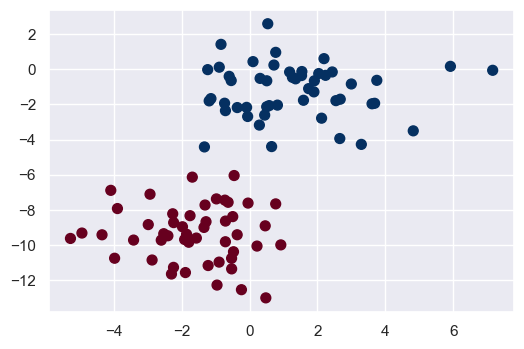

In [96]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

- One extremely fast way to create a simple model is to assume that the data is
described by a Gaussian distribution with no covariance between dimensions. We can
fit this model by simply finding the mean and standard deviation of the points within
each label, which is all you need to define such a distribution.

In [97]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Now let’s generate some new data and predict the label:

In [98]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

* Now we can plot this new data to get an idea of where the decision boundary is

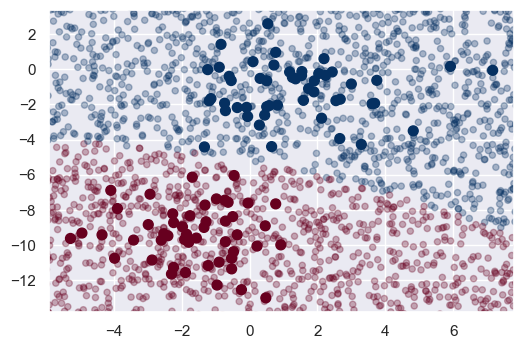

In [99]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.3)
plt.axis(lim);

 We see a slightly curved boundary in the classifications—in general, the boundary in
Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic
classification, which we can compute using the `predict_proba method`:

In [100]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### Multinomial Naive Bayes

- One place where multinomial naive Bayes is often used is in text classification, where
the features are related to word counts or frequencies within the documents to be
classified. here we will use the sparse word count features from the 20
Newsgroups corpus to show how we might classify these short documents into
categories.

- Let’s download the data and take a look at the target names:

In [101]:
from sklearn.datasets import fetch_20newsgroups

In [102]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

- For simplicity, we will select just a few of these categories, and download the training
and testing set:

In [103]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

- Here is a representative entry from the data:

In [104]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



- In order to use this data for machine learning, we need to be able to convert the content
of each string into a vector of numbers. For this we will use the TF–IDF vectorizer, and create a pipeline that
attaches it to a multinomial naive Bayes classifier:

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for
the test data:

In [106]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn
about the performance of the estimator. For example, here is the confusion matrix
between the true and predicted labels for the test data:

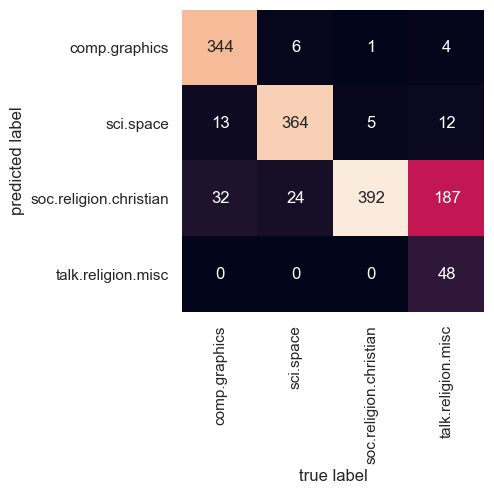

In [107]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from
computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for
any string, using the predict() method of this pipeline. Here’s a quick utility function
that will return the prediction for a single string:

In [108]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [109]:
predict_category('sending a payload to the ISS')

'sci.space'

In [110]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [111]:
predict_category('determining the screen resolution')

'comp.graphics'

- Remember that this is nothing more sophisticated than a simple probability model
for the (weighted) frequency of each word in the string; nevertheless, the result is
striking. Even a very naive algorithm, when used carefully and trained on a large set
of high-dimensional data, can be surprisingly effective.

## Linear Regression

### Simple Linear Regression

Consider the following data, which is scattered about a line with a slope of 2 and an
intercept of –5:

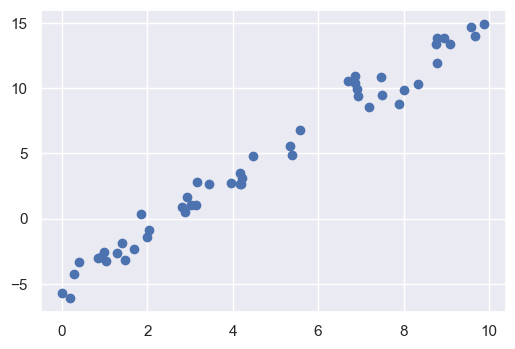

In [112]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

- We can use Scikit-Learn’s LinearRegression estimator to fit this data and construct
the best-fit line

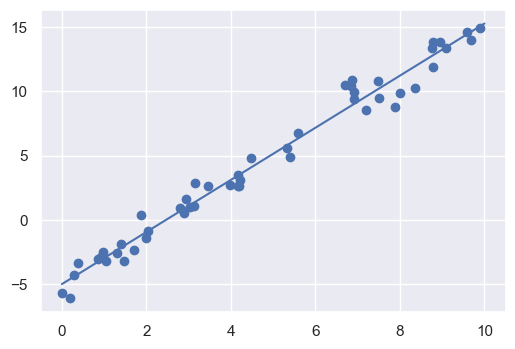

In [114]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

- The slope and intercept of the data are contained in the model’s fit parameters, which
in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters
are `coef_` and `intercept_`:

In [119]:
print("Model slope: ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:  2.027208810360695
Model intercept: -4.998577085553202


- We see that the results are very close to the inputs, as we might hope.

The LinearRegression estimator is much more capable than this, however—in addition
to simple straight-line fits, it can also handle multidimensional linear models of
the form:  
$$y = a0 + a1x1 + a2x2 + ⋯$$
where there are multiple x values. Geometrically, this is akin to fitting a plane to
points in three dimensions, or fitting a hyper-plane to points in higher dimensions.
The multidimensional nature of such regressions makes them more difficult to visualize,
but we can see one of these fits in action by building some example data, using
NumPy’s matrix multiplication operator:

In [144]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000144
[ 1.5 -2.   1. ]


- Here the y data is constructed from three random x values, and the linear regression
recovers the coefficients used to construct the data.

### Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between
variables is to transform the data according to basis functions.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using
the PolynomialFeatures transformer:

In [166]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

- We see here that the transformer has converted our one-dimensional array into a
three-dimensional array by taking the exponent of each value. This new, higherdimensional
data representation can then be plugged into a linear regression.

- the cleanest way to accomplish this is to use a pipeline. Let’s make a 7th-degree polynomial model in this way:

In [167]:
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

With this transform in place, we can use the linear model to fit much more complicated
relationships between x and y. For example, here is a sine wave with noise

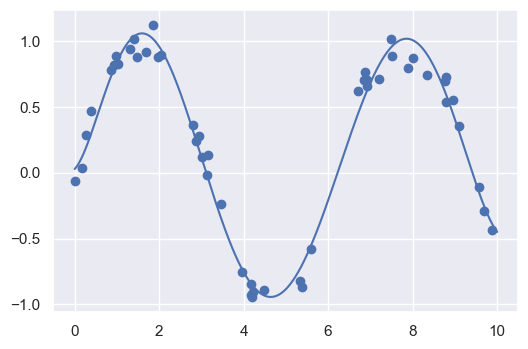

In [168]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

- Our linear model, through the use of 7th-order polynomial basis functions, can provide
an excellent fit to this nonlinear data!

## Example: Predicting Bicycle Traffic

we will join the bike data with another dataset, and try to determine
the extent to which weather and seasonal factors—temperature, precipitation, and
daylight hours—affect the volume of bicycle traffic through this corridor. We will perform a simple linear regression to relate weather and other information to bicycle counts, in order to estimate how a change in any one of these parameters affects the number of riders on a given day.

In [155]:
import pandas as pd
counts = pd.read_csv('Data/FremontBridge.csv', index_col='Date', parse_dates=True)
counts.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [156]:
weather = pd.read_csv('Data/BicycleWeather.csv', index_col='DATE', parse_dates=True)
weather

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-28,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,5,0,0,233,156,26,230,240,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2015-08-29,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,325,0,0,222,133,58,210,210,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2015-08-30,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,102,0,0,200,128,47,200,200,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


- Next we will compute the total daily bicycle traffic, and put this in its own DataFrame:

In [157]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

daily

,Total
Date,
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0
2012-10-07,4284.0
...,...
2020-03-27,1970.0
2020-03-28,2916.0
2020-03-29,5734.0


- We saw previously that the patterns of use generally vary from day to day; let's account for this in our data by adding binary columns that indicate the day of the week:

In [158]:
daily["days"] = daily.index.weekday_name
daily.head()

,Total,days
Date,,
2012-10-03,7042.0,Wednesday
2012-10-04,6950.0,Thursday
2012-10-05,6296.0,Friday
2012-10-06,4012.0,Saturday
2012-10-07,4284.0,Sunday


In [159]:
days_col = ['Total','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [160]:
daily = pd.get_dummies(data= daily, dtype=float, prefix="", prefix_sep="")

daily.head()

,Total,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,
2012-10-03,7042.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-10-04,6950.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-05,6296.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-07,4284.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [161]:
daily= daily.reindex(columns=days_col)
daily.head()

,Total,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Date,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


- Similarly, we might expect riders to behave differently on holidays; let's add an indicator of this as well:

In [162]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2020-03-31')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [163]:
daily.head()

,Total,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,holiday
Date,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


- We also might suspect that the hours of daylight would affect how many people ride; let's use the standard astronomical calculation to add this information:

In [164]:
import numpy as np
import matplotlib.pyplot as plt

(8, 17)

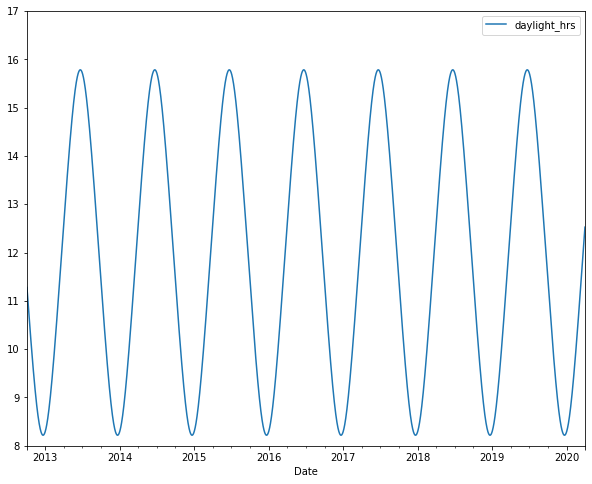

In [165]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot(figsize=(10,8))
plt.ylim(8, 17)

- We can also add the average temperature and total precipitation to the data. In addition to the inches of precipitation, let's add a flag that indicates whether a day is dry (has zero precipitation):

In [166]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']],)

- Finally, let's add a counter that increases from day 1, and measures how many years have passed. This will let us measure any observed annual increase or decrease in daily crossings:

In [167]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

- Now our data is in order, and we can take a look at it:

In [168]:
daily

,Total,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,1970.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.290651,NaN,NaN,NaN,7.484932
2020-03-28,2916.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.349429,NaN,NaN,NaN,7.487671
2020-03-29,5734.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.408159,NaN,NaN,NaN,7.490411


- With this in place, we can choose the columns to use, and fit a linear regression model to our data. We will set fit_intercept = False, because the daily flags essentially operate as their own day-specific intercepts:

In [169]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

In [170]:
from sklearn.linear_model import LinearRegression

In [171]:
X = daily.drop("Total", axis=1)
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

- Finally, we can compare the total and predicted bicycle traffic visually:

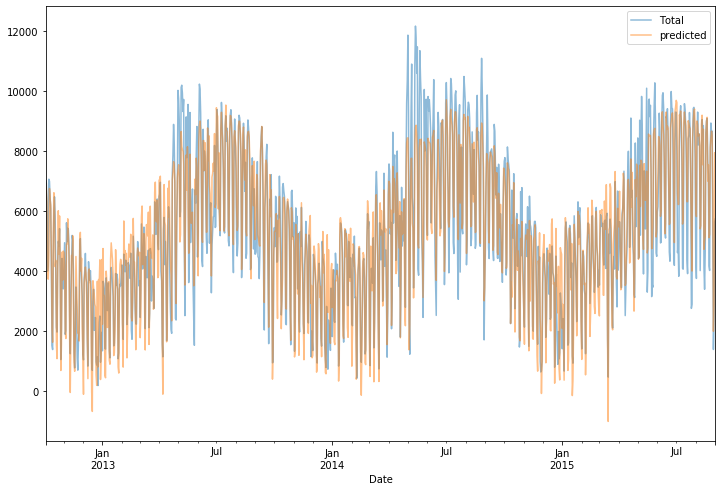

In [172]:
daily[['Total', 'predicted']].plot(alpha=0.5, figsize=(12,8));

- It is evident that we have missed some key features, especially during the summer time. Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures). Nevertheless, our rough approximation is enough to give us some insights, and we can take a look at the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count:

In [173]:
params = pd.Series(model.coef_, index=X.columns)
params

Monday          1009.765512
Tuesday         1220.467872
Wednesday       1185.347283
Thursday         964.716230
Friday           355.960691
Saturday       -2206.603421
Sunday         -2267.134492
holiday        -2374.802762
daylight_hrs     257.703022
PRCP           -1329.669764
Temp (C)         130.325582
dry day         1095.397185
annual            53.885426
dtype: float64

- These numbers are difficult to interpret without some measure of their uncertainty. We can compute these uncertainties quickly using bootstrap resamplings of the data:

In [174]:
from sklearn.utils import resample

np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)

- With these errors estimated, let's again look at the results:

In [175]:
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

              effect  error
Monday        1010.0  173.0
Tuesday       1220.0  166.0
Wednesday     1185.0  166.0
Thursday       965.0  170.0
Friday         356.0  162.0
Saturday     -2207.0  159.0
Sunday       -2267.0  166.0
holiday      -2375.0  326.0
daylight_hrs   258.0   18.0
PRCP         -1330.0  125.0
Temp (C)       130.0    7.0
dry day       1095.0   66.0
annual          54.0   35.0


- We first see that there is a relatively stable trend in the weekly baseline: there are many more riders on weekdays than on weekends and holidays. We see that for each additional hour of daylight, 258 ± 18 more people choose to ride; a temperature increase of one degree Celsius encourages 130 ± 7 people to grab their bicycle; a dry day means an average of 1095 ± 66 more riders, and each inch of precipitation means 1330 ± 125 more people leave their bike at home. Once all these effects are accounted for, we see a modest increase of 54 ± 35 new daily riders each year.

- Our model is almost certainly missing some relevant information. For example, nonlinear effects (such as effects of precipitation and cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model. Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday's numbers, or the effect of an unexpected sunny day after a streak of rainy days). These are all potentially interesting effects, and you now have the tools to begin exploring them if you wish!

Source: Python Data Science Handbook - Jake VanderPlas